# Appendix for the final project

## Importing data and libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector


In [2]:
raw_data = pd.read_csv('kc_house_data.csv')
raw_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df = raw_data.copy()
df = df.drop(['id', 'date'], axis=1)


### Creating a box plot and histogram to visualize the data for each columns value distribution. 
To get a deeper understanding of the above table and for data exploratory, we now create a boxplot and histogram for every individual varibale. 
The boxplot provides a concise visual summary of the data's central tendency, spread, and presence of outliers. The histogram will help us understand the spread of every variable and central  tendency. 
Overall, this helps us gain insight in the varibaility of each feature and what features have skewed data.



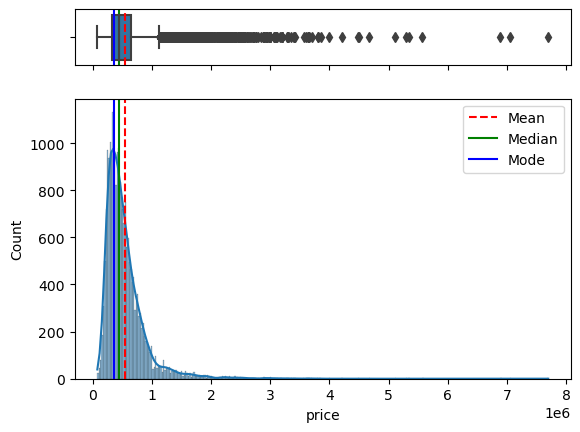

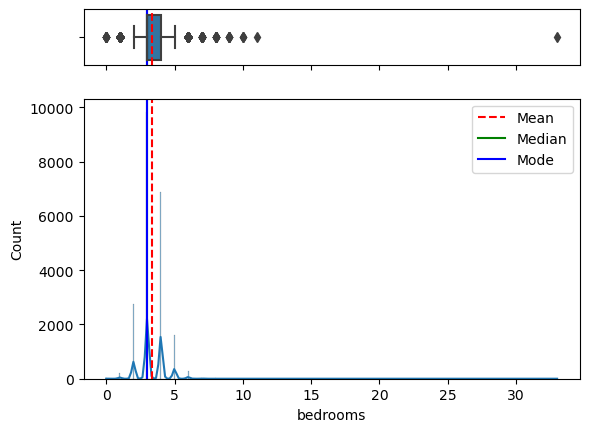

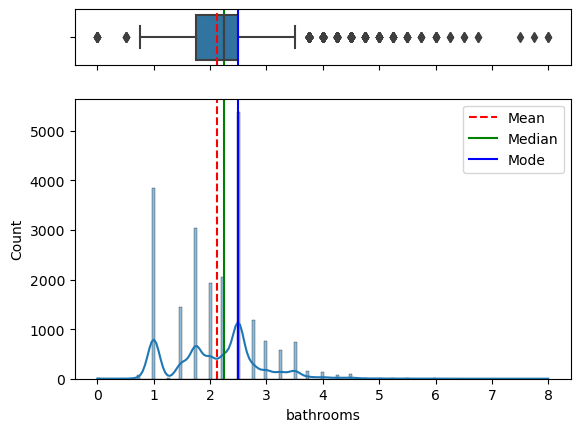

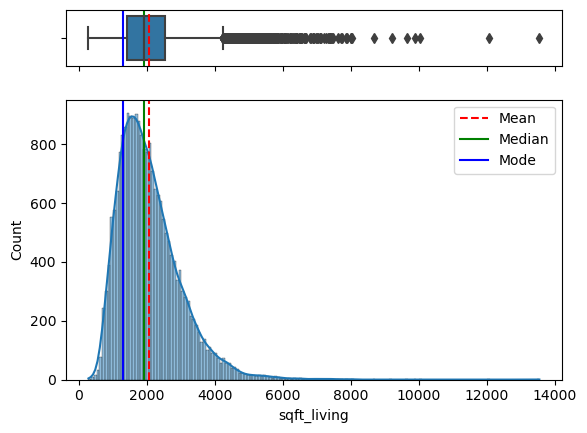

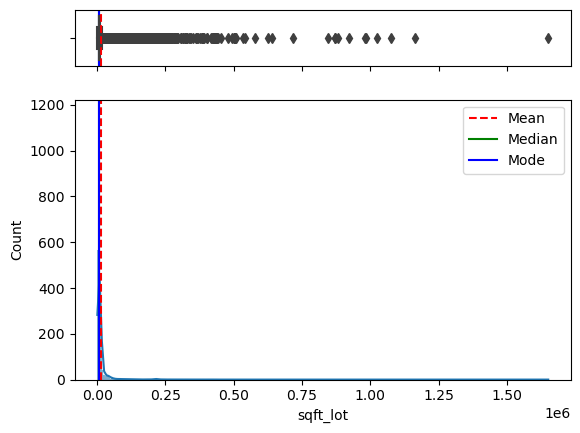

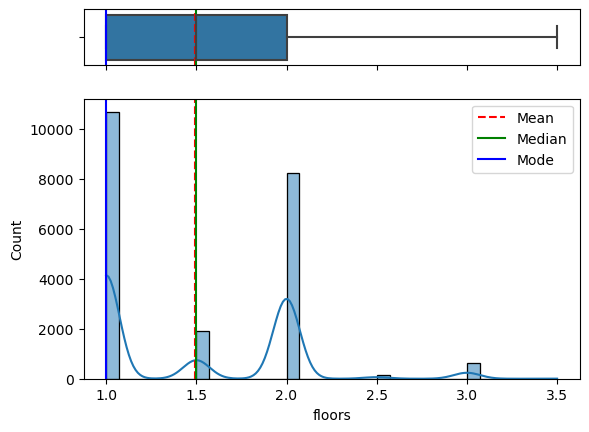

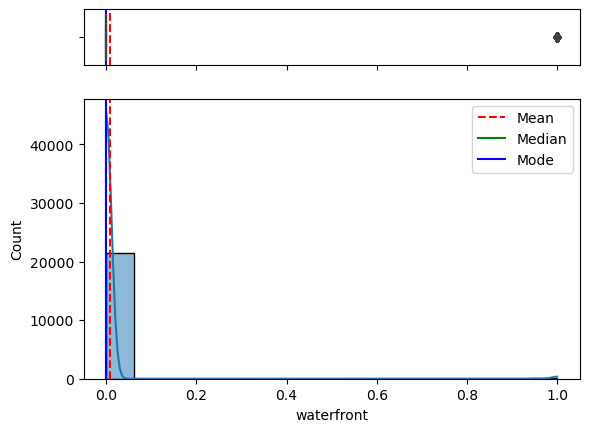

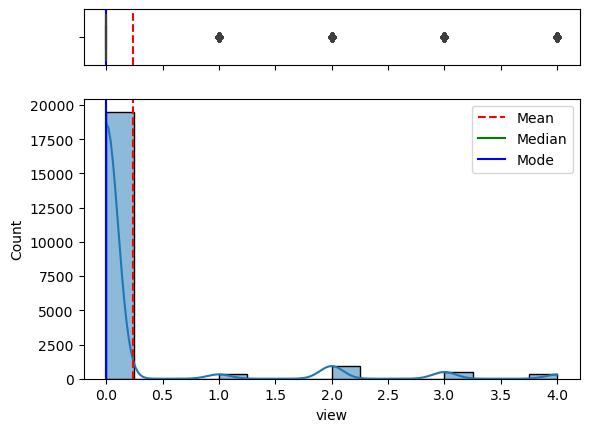

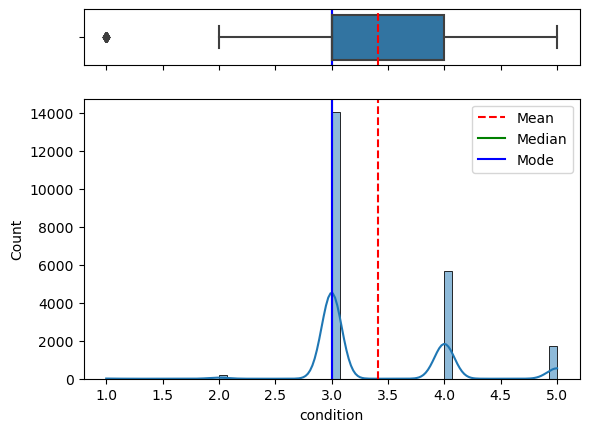

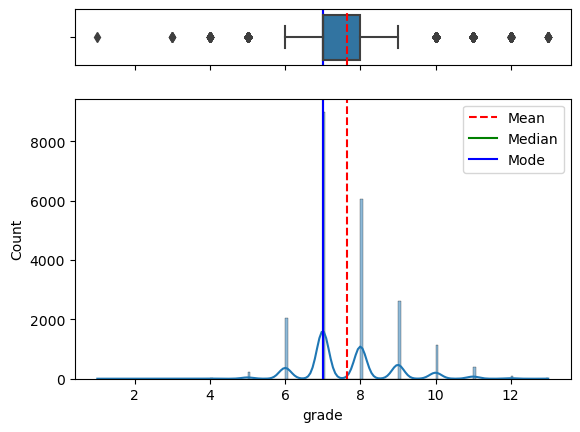

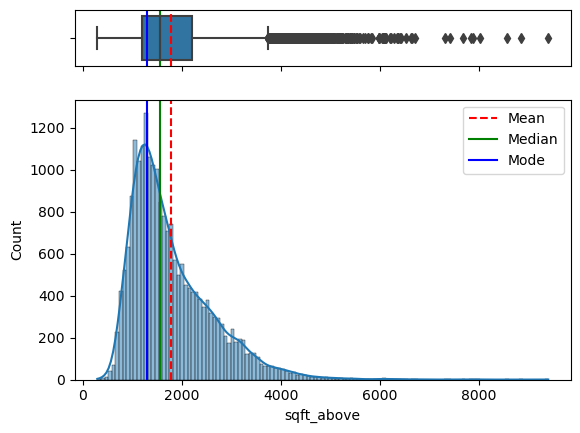

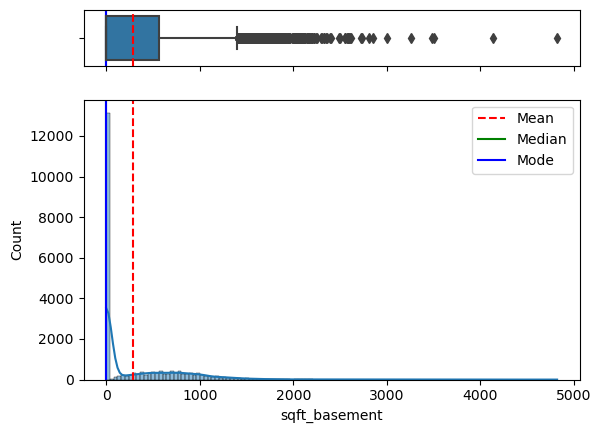

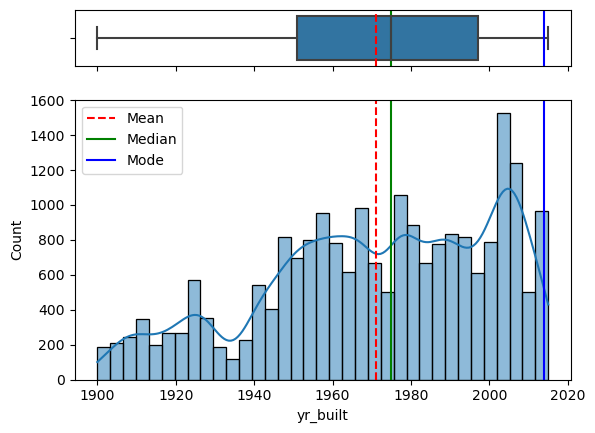

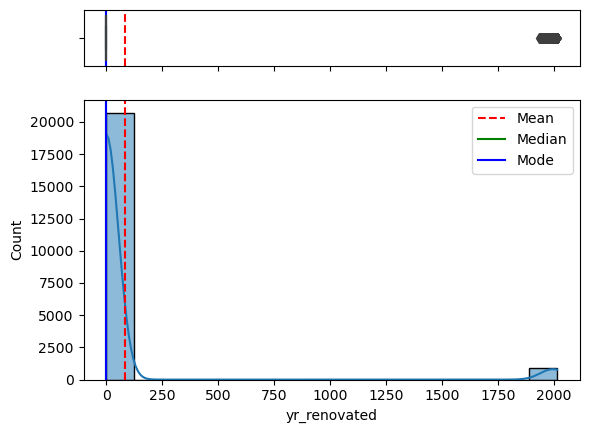

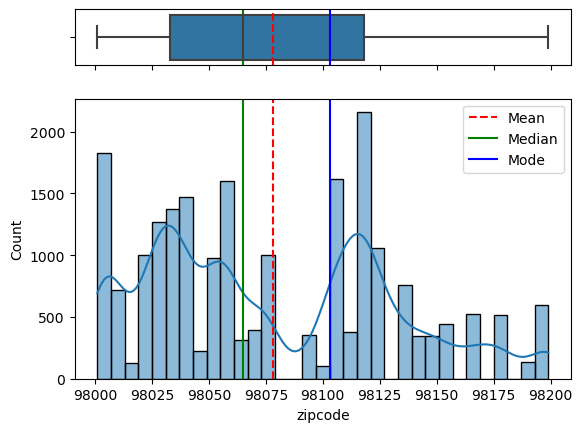

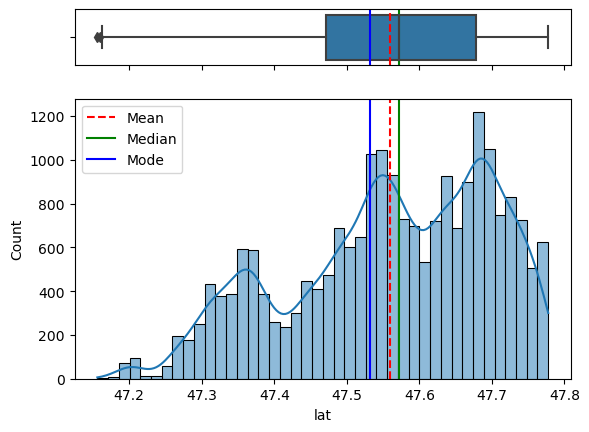

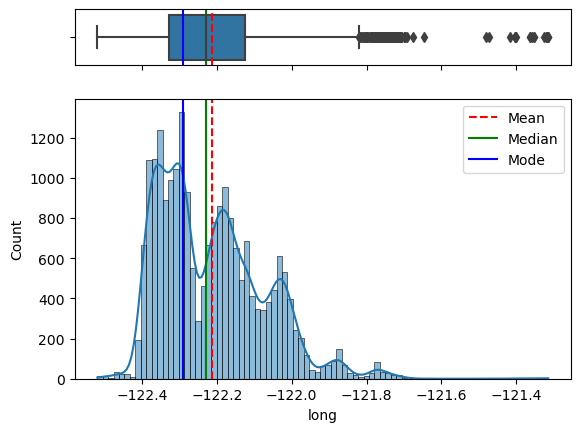

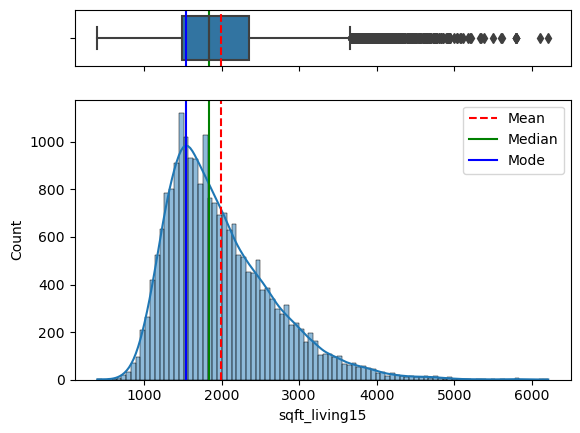

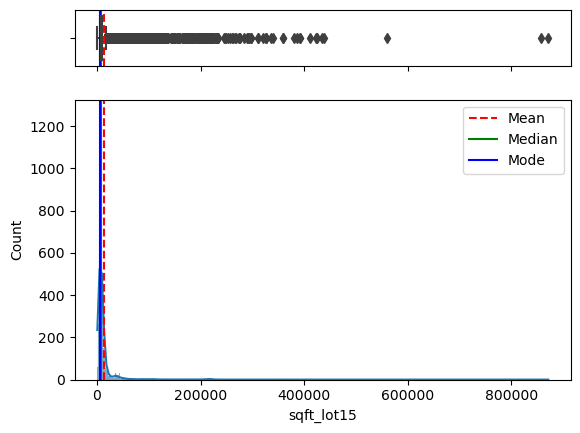

In [14]:
j=1
for i in df.columns:
    f, (ax_box, hist_ax) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
    mean=df[i].mean()
    median=df[i].median()
    mode=df[i].mode().values[0]

    sns.boxplot(data=df, x=i, ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    ax_box.axvline(mode, color='b', linestyle='-')

    sns.histplot(data=df, x=i, ax=hist_ax, kde=True)
    hist_ax.axvline(mean, color='r', linestyle='--', label="Mean")
    hist_ax.axvline(median, color='g', linestyle='-', label="Median")
    hist_ax.axvline(mode, color='b', linestyle='-', label="Mode")

    hist_ax.legend()

    ax_box.set(xlabel='')
    plt.show()

## Code for LR, Elastic Net Regression and Random Forest Regression

In [15]:
# Split the data into train and test sets
X = df.drop('price', axis=1)
y = df['price']
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# create a pipeline for linear regression
numeric_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']
one_hot_features = ['floors']
onehot = OneHotEncoder()
scaler = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', scaler, numeric_features),
        ('one_hot', onehot, one_hot_features)
    ])
pipe_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [17]:
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['sqft_living', 'sqft_lot',
                                                   'sqft_above',
                                                   'sqft_basement',
                                                   'sqft_living15',
                                                   'sqft_lot15']),
                                                 ('one_hot', OneHotEncoder(),
                                                  ['floors'])])),
                ('regressor', LinearRegression())])

In [18]:
y_hat_lr = pipe_lr.predict(X_test)

MSE:  63371994582.899796
RMSE:  251737.9482376461
MAE:  168270.61971589815
R2:  0.5155781115334925


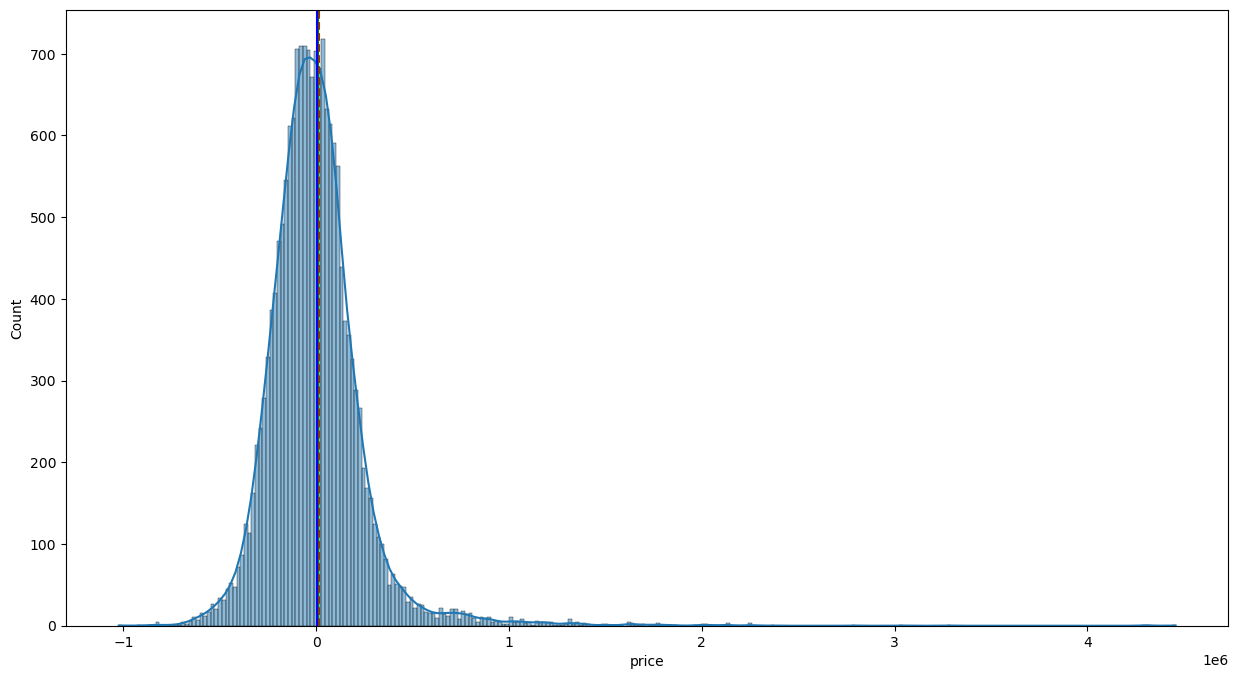

In [19]:
# Evaluate the model
print('MSE: ', mean_squared_error(y_test, y_hat_lr))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_hat_lr)))
print('MAE: ', np.mean(np.abs(y_test - y_hat_lr)))
print('R2: ', r2_score(y_test, y_hat_lr))

# plot the error
plt.figure(figsize=(15,8))
sns.histplot(y_test-y_hat_lr, kde=True)
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode, color='b', linestyle='-', label="Mode")
plt.show()

In [ ]:
# Create a pipeline
numeric_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']
one_hot_features = ['floors']
onehot = OneHotEncoder()
scaler = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', scaler, numeric_features),
        ('one_hot', onehot, one_hot_features)
    ])
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet())
])

In [ ]:
# fitting the model

pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['sqft_living', 'sqft_lot',
                                                   'sqft_above',
                                                   'sqft_basement',
                                                   'sqft_living15',
                                                   'sqft_lot15']),
                                                 ('one_hot', OneHotEncoder(),
                                                  ['waterfront', 'view'])])),
                ('regressor', ElasticNet())])

In [ ]:
y_hat = pipe.predict(X_test)

MSE:  64875261418.6878
RMSE:  254706.2257163884
MAE:  164516.49549177077
R2:  0.5040869889287136


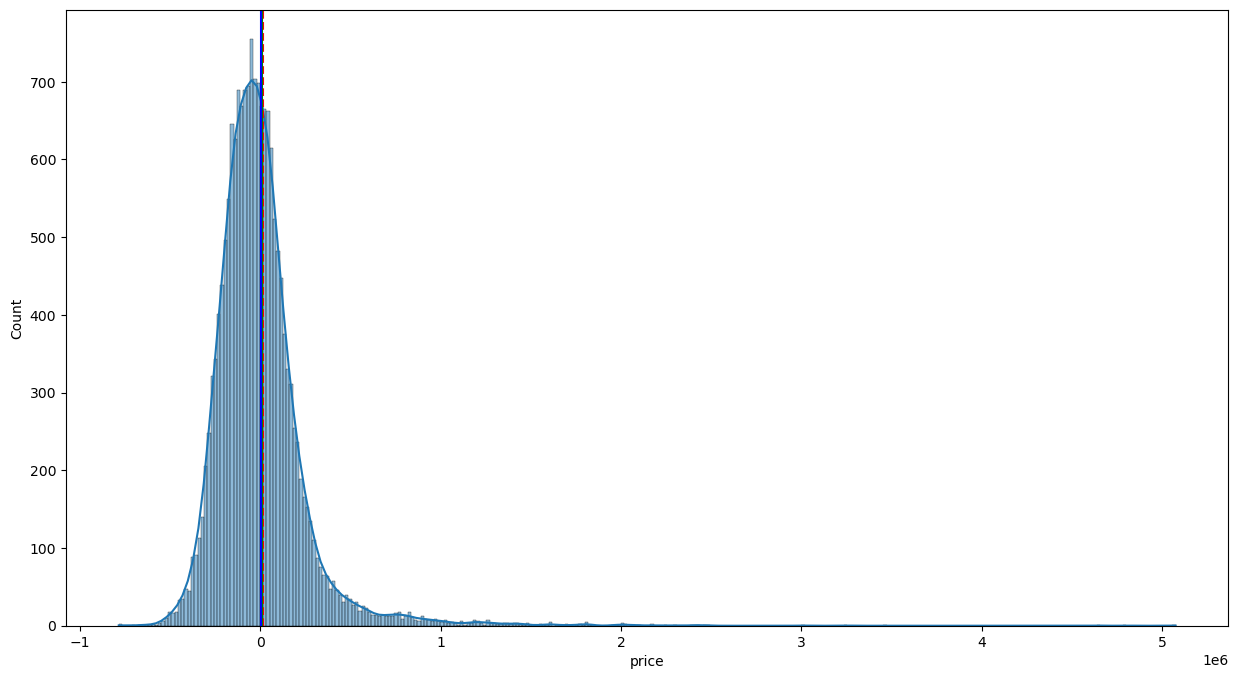

In [ ]:
# Evaluate the model
print('MSE: ', mean_squared_error(y_test, y_hat))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_hat)))
print('MAE: ', np.mean(np.abs(y_test - y_hat)))
print('R2: ', r2_score(y_test, y_hat))

# plot the error
plt.figure(figsize=(15,8))
sns.histplot(y_test-y_hat, kde=True)
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode, color='b', linestyle='-', label="Mode")
plt.show()

### RANDOM FORESTS

In [ ]:
# trying a random forrest regressor
from sklearn.ensemble import RandomForestRegressor

# Create a pipeline
numeric_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']
one_hot_features = ['waterfront', 'view', ]
onehot = OneHotEncoder()
scaler = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', scaler, numeric_features),
        ('one_hot', onehot, one_hot_features)
    ])
pipe_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# fitting the model

pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['sqft_living', 'sqft_lot',
                                                   'sqft_above',
                                                   'sqft_basement',
                                                   'sqft_living15',
                                                   'sqft_lot15']),
                                                 ('one_hot', OneHotEncoder(),
                                                  ['waterfront', 'view'])])),
                ('regressor', RandomForestRegressor())])

MSE:  48492066878.80288
RMSE:  220209.14349500314
MAE:  143728.43386096283
R2:  0.6293217726902265


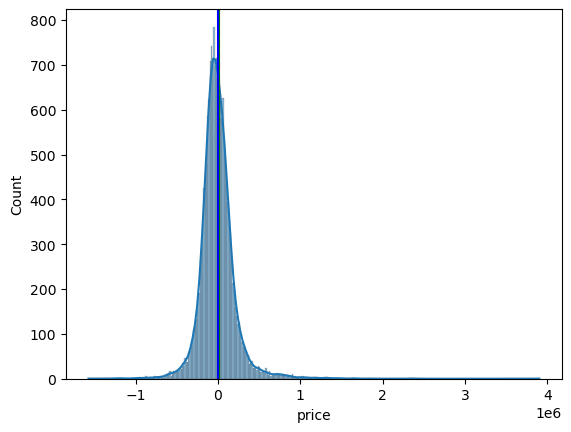

In [ ]:
y_hat_rf = pipe_rf.predict(X_test)
error_rf = y_test-y_hat_rf
print('MSE: ', mean_squared_error(y_test, y_hat_rf))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_hat_rf)))
print('MAE: ', np.mean(np.abs(y_test - y_hat_rf)))
print('R2: ', r2_score(y_test, y_hat_rf))

sns.histplot(error_rf, kde=True)
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode, color='b', linestyle='-', label="Mode")
plt.show()